In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import metrics
from matplotlib import pyplot as plt
import joblib

# importing and cleaning data 

In [94]:
dataset= pd.read_csv('Loan_default.csv')
dataset.head(10)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


(array([225694.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  29653.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

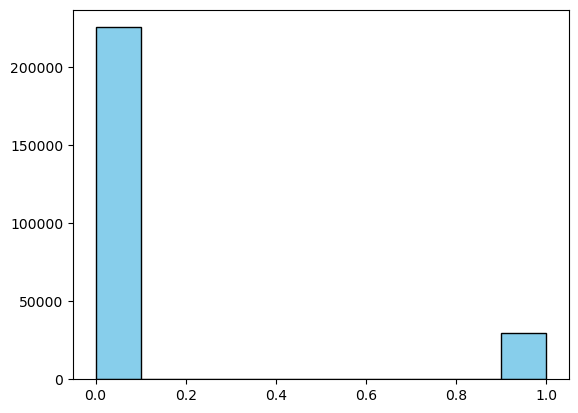

In [95]:
plt.hist(dataset.Default, bins=10, color='skyblue', edgecolor='black')

In [96]:
# cle_ds=dataset.drop(["LoanID","MonthsEmployed","NumCreditLines","HasCoSigner","LoanPurpose"],axis=1)
cle_ds=dataset.drop(["LoanID","LoanPurpose"],axis=1)
cle_ds

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,No,0


In [100]:
daummied_ds = pd.get_dummies(cle_ds, columns=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents','HasCoSigner'])
df=pd.DataFrame(daummied_ds)

output_file_path = 'output_dataset.csv'
df.to_csv(output_file_path, index=False)
daummied_ds.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'HasCoSigner_No',
       'HasCoSigner_Yes'],
      dtype='object')

In [101]:
x=daummied_ds.drop(["Default"],axis=1)
y=dataset.Default
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Logistic Regression model

Training Accuracy(Logistic_Regression): 0.8842857302704457
Test Accuracy(Logistic_Regression): 0.8844722929312708
score (Logistic_Regression): 0.021883289124668436
Confusion Matrix:
[[67656    73]
 [ 8777    99]]


c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


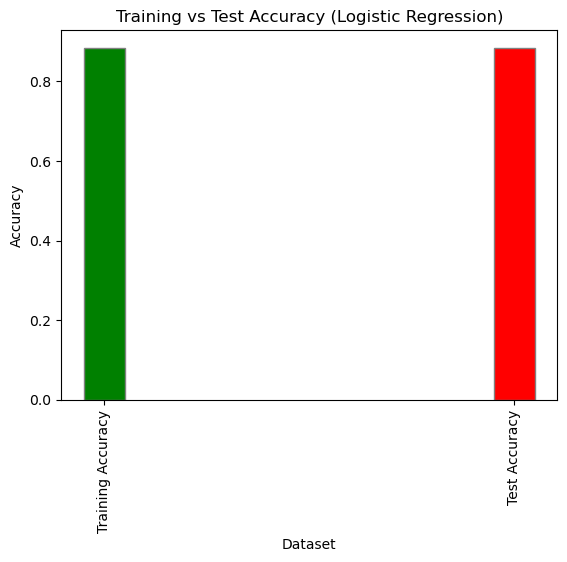

In [102]:
model_Logistic_Regression=LogisticRegression()

model_Logistic_Regression.fit(X_train,y_train)


pred_training=model_Logistic_Regression.predict(X_train)
pred=model_Logistic_Regression.predict(X_test)


model_Logistic_Regression.score(X_test,y_test)


acc_training_Logistic_Regression= accuracy_score(y_train,pred_training)
acc_Logistic_Regression= accuracy_score(y_test,pred)

score_Logistic_Regression=f1_score(y_test,pred)

print(f"Training Accuracy(Logistic_Regression): {acc_training_Logistic_Regression}")
print(f"Test Accuracy(Logistic_Regression): {acc_Logistic_Regression}")
print(f"score (Logistic_Regression): {score_Logistic_Regression}")


cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)


accuracies = [acc_training_Logistic_Regression, acc_Logistic_Regression] 
labels = ['Training Accuracy', 'Test Accuracy'] 



# x = np.array([[25, 83994, 505, 520, 223, 4, 15.23, 436, 0.44, 12, True, False, False, False, True, False, 
#                False, False, True, False, False, True, True, False, True, True, False]])

# pr = model_Logistic_Regression.predict(x)

# print("Prediction for the input:")
# print(pr)


plt.bar(labels, accuracies, color=['g', 'r'], width=0.10, edgecolor='grey')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy (Logistic Regression)')
plt.xticks(rotation=90)  
plt.show()


joblib.dump(model_Logistic_Regression, 'model_Logistic_Regression.joblib')

mj = joblib.load('model_Logistic_Regression.joblib')

# Random Forest Classifier

Training Accuracy(RandomForest): 0.999972026720077
Test Accuracy(RandomForest): 0.885359963448861
score (RandomForestscore): 0.07186641302050306
Confusion Matrix:
[[67483   246]
 [ 8536   340]]


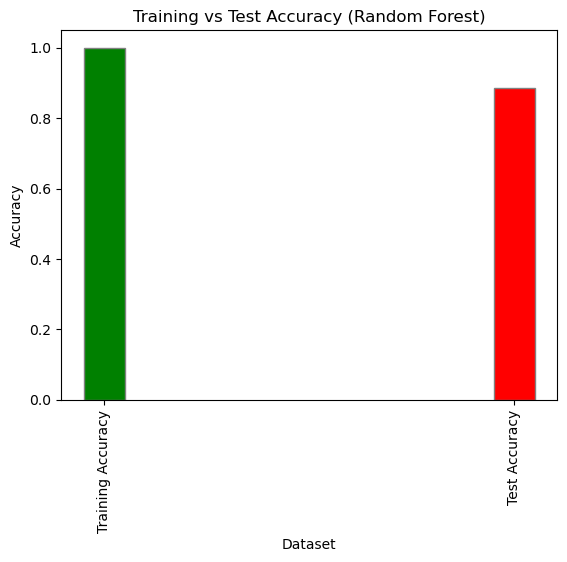

In [103]:
model_RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
model_RandomForest.fit(X_train, y_train)

pred_training = model_RandomForest.predict(X_train)
pred = model_RandomForest.predict(X_test)

acc_training_RandomForest = accuracy_score(y_train, pred_training)
acc_RandomForest = accuracy_score(y_test, pred)

score_RandomForest=f1_score(y_test,pred)

print(f"Training Accuracy(RandomForest): {acc_training_RandomForest}")
print(f"Test Accuracy(RandomForest): {acc_RandomForest}")
print(f"score (RandomForestscore): {score_RandomForest}")


# x = np.array([[56, 85994, 505, 520, 22, 4, 15.23, 36, 0.44, 0, True, False, False, False, True, False, 
#                False, False, True, False, False, True, True, False, True, True, False]])

# pr = model_RandomForest.predict(x)

# print("Prediction for the input:")
# print(pr)


cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

accuracies = [acc_training_RandomForest, acc_RandomForest]
labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(labels, accuracies, color=['g', 'r'], width=0.10, edgecolor='grey')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy (Random Forest)')
plt.xticks(rotation=90)
plt.show()



# naive bayes

Training Accuracy(naive bayes): 0.884308108894384
Test Accuracy(naive bayes): 0.8845636707786698
Test fscores(naive bayes): 0.013388374428204843
Confusion Matrix:
[[67702    27]
 [ 8816    60]]


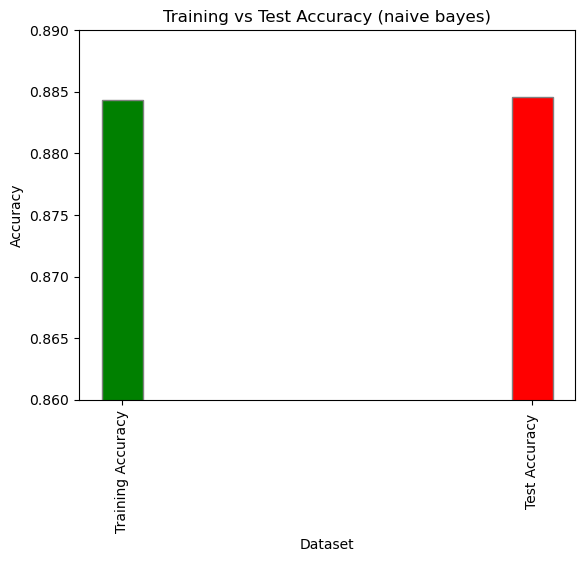

In [104]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
                             
                             
model_naive_bayes.fit(X_train,y_train)
pred_training=model_naive_bayes.predict(X_train)
pred=model_naive_bayes.predict(X_test)


acc_training_naive_bayes= accuracy_score(y_train,pred_training)
acc_naive_bayes= accuracy_score(y_test,pred)


score_naive_bayes=f1_score(y_test,pred)


print(f"Training Accuracy(naive bayes): {acc_training_naive_bayes}")
print(f"Test Accuracy(naive bayes): {acc_naive_bayes}")

print(f"Test fscores(naive bayes): {score_naive_bayes}")

cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

accuracies = [acc_training_naive_bayes, acc_naive_bayes] 


labels = ['Training Accuracy', 'Test Accuracy ']
plt.bar(labels, accuracies, color=['g', 'r'], width=0.10, edgecolor='grey')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy (naive bayes)')
plt.ylim(0.86,0.89)
plt.xticks(rotation=90)  
plt.show()


joblib.dump(model_naive_bayes, 'model_naive_bayes.joblib')
mj = joblib.load('model_naive_bayes.joblib')


# KNN

Training Accuracy(KNN): 0.8895391122399884
Test Accuracy(KNN): 0.8733111415703936
score (KNN): 0.07597829191659526
Confusion Matrix:
[[66501  1228]
 [ 8477   399]]


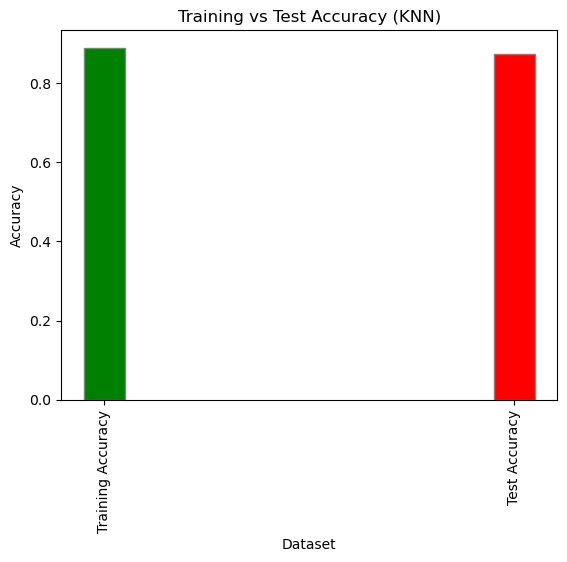

In [105]:
from sklearn.neighbors import KNeighborsClassifier


X_train = np.array(X_train).astype(float)  # Adjust data type as needed
X_test = np.array(X_test).astype(float)  # Adjust data type as needed

model_KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Adjust n_neighbors and metric as needed
model_KNN.fit(X_train, y_train)

 
pred_training = model_KNN.predict(X_train)
pred = model_KNN.predict(X_test)

acc_training_KNN = accuracy_score(y_train, pred_training)
acc_KNN = accuracy_score(y_test, pred)

score_KNN=f1_score(y_test,pred)

print(f"Training Accuracy(KNN): {acc_training_KNN}")
print(f"Test Accuracy(KNN): {acc_KNN}")
print(f"score (KNN): {score_KNN}")


cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

accuracies = [acc_training_KNN, acc_KNN]
labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(labels, accuracies, color=['g', 'r'], width=0.10, edgecolor='grey')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy (KNN)')
plt.xticks(rotation=90)
plt.show()

joblib.dump(model_KNN, 'model_KNN.joblib')

loaded_model = joblib.load('model_KNN.joblib')

# overall evaluation 

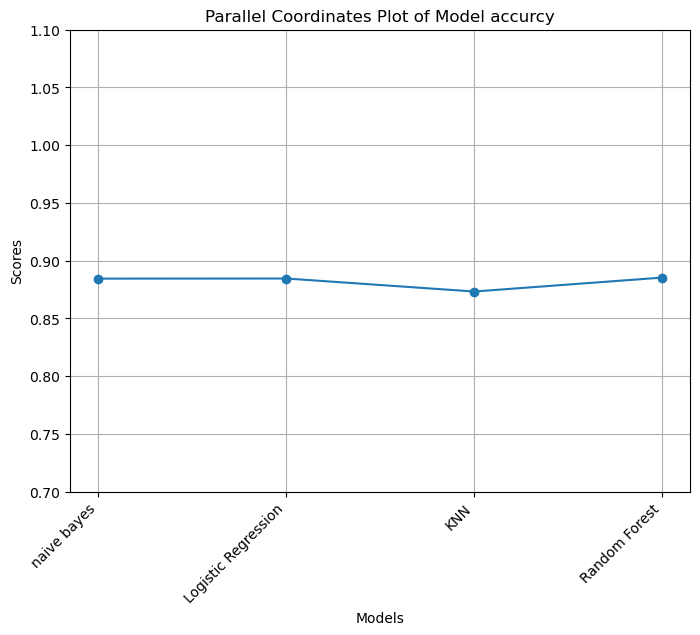

In [106]:
models = [ 'naive bayes','Logistic Regression','KNN','Random Forest']
scores = [ acc_Logistic_Regression,acc_naive_bayes,acc_KNN,acc_RandomForest]
 
#Create DataFrame
df = pd.DataFrame({'Model': models, 'Score': scores})

#Create parallel coordinates plot
plt.figure(figsize=(8, 6))
plt.plot(df['Model'], df['Score'], marker='o')
plt.title('Parallel Coordinates Plot of Model accurcy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0.7,1.1)
plt.grid(True)  # Show grid lines
plt.show()

In [ ]:
from tkinter import *
from tkinter import ttk
def start_application():
    root = Tk()
    root.title("Loan Default Prediction")
    root.geometry("800x400")

    # Create a custom style for the frames with a background color
    style = ttk.Style()
    style.configure("Custom.TFrame", background="white")

    # Data entry frame
    data_entry_frame = ttk.Frame(root, padding="10", relief="raised", borderwidth=2, style="Custom.TFrame")
    data_entry_frame.grid(row=0, column=0, padx=10, pady=10, sticky="nsew")

    labels = ["Loan ID", "Age", "Income", "Loan Amount", "Credit Score", "Months Employed", "Num Credit Lines",
              "Interest Rate", "Loan Term", "DTI Ratio", "Education", "Employment Type", "Marital Status",
              "Has Mortgage", "Has Dependents", "Loan Purpose", "Has CoSigner"]

    values = [[""], [0], [0], [0], [0], [0], ["1", "2", "3", "4"], [0.0], [0], [0.0],
              ["Bachelor's", "Master's", "High School", "PhD"],
              ["Full-time", "Part-time", "Self-employed", "Unemployed"],
              ["Single", "Married", "Divorced"], ["Yes", "No"], ["Yes", "No"],
              ["Business", "Auto", "Home", "Education", "Other"], ["Yes", "No"]]

    for i, label_text in enumerate(labels):
        if label_text == "Loan Purpose":
            label = ttk.Label(data_entry_frame, text=label_text, background="white")
            label.grid(row=i, column=0, padx=5, pady=5, sticky="w")

            entry = ttk.Combobox(data_entry_frame, values=["Business", "Auto", "Home", "Education", "Other"])
            entry.grid(row=i, column=1, padx=5, pady=5, sticky="ew")
        else:
            label = ttk.Label(data_entry_frame, text=label_text, background="white")
            label.grid(row=i, column=0, padx=5, pady=5, sticky="w")

            if i in [6, 10, 11, 12, 13, 14, 16, 17]:
                entry = ttk.Combobox(data_entry_frame, values=values[i])
            else:
                entry = ttk.Entry(data_entry_frame)

            entry.grid(row=i, column=1, padx=5, pady=5, sticky="ew")

    results_frame = ttk.Frame(root, padding="10", relief="raised", borderwidth=2, style="Custom.TFrame")
    results_frame.grid(row=0, column=1, padx=10, pady=10, sticky="nsew")

    # Prediction frames
    prediction_frame_nb = ttk.Frame(root, padding="10", relief="raised", borderwidth=2, style="Custom.TFrame")
    prediction_frame_nb.grid(row=0, column=1, padx=10, pady=10, sticky="nsew")

    nb_label = ttk.Label(prediction_frame_nb, text="Naive Bayes", background="white", font=("Helvetica", 20))
    nb_label.pack()

    nb_result_label = ttk.Label(prediction_frame_nb, text="", background="white", font=("Helvetica", 16))
    nb_result_label.pack()

    prediction_frame_logistic = ttk.Frame(root, padding="10", relief="raised", borderwidth=2, style="Custom.TFrame")
    prediction_frame_logistic.grid(row=0, column=2, padx=10, pady=10, sticky="nsew")

    logistic_label = ttk.Label(prediction_frame_logistic, text="Logistic", background="white", font=("Helvetica", 20))
    logistic_label.pack()

    logistic_result_label = ttk.Label(prediction_frame_logistic, text="", background="white", font=("Helvetica", 16))
    logistic_result_label.pack()

    prediction_frame_knn = ttk.Frame(root, padding="10", relief="raised", borderwidth=2, style="Custom.TFrame")
    prediction_frame_knn.grid(row=0, column=3, padx=10, pady=10, sticky="nsew")

    knn_label = ttk.Label(prediction_frame_knn, text="KNN", background="white", font=("Helvetica", 20))
    knn_label.pack()

    knn_result_label = ttk.Label(prediction_frame_knn, text="", background="white", font=("Helvetica", 16))
    knn_result_label.pack()

    def start_prediction():
        # Placeholder function for starting the prediction
        # Here you would calculate the prediction and update the output labels with true or false
        # For demonstration, we'll just update the labels with "True" or "False"
        nb_result_label.config(text="True")
        logistic_result_label.config(text="False")
        knn_result_label.config(text="True")

    start_prediction_button = ttk.Button(root, text="Start Prediction", command=start_prediction)
    start_prediction_button.grid(row=1, column=0, columnspan=4, padx=5, pady=5, sticky="ew")

    def reset_fields():
        for child in data_entry_frame.winfo_children():
            if isinstance(child, ttk.Entry):
                child.delete(0, END)
            elif isinstance(child, ttk.Combobox):
                child.set("")
        # Clear the prediction results
        nb_result_label.config(text="")
        logistic_result_label.config(text="")
        knn_result_label.config(text="")

    reset_button = ttk.Button(root, text="Reset", command=reset_fields)
    reset_button.grid(row=2, column=0, columnspan=4, padx=5, pady=5, sticky="ew")

    root.grid_rowconfigure(0, weight=1)
    root.grid_columnconfigure(0, weight=1)
    root.grid_columnconfigure(1, weight=1)
    root.grid_columnconfigure(2, weight=1)
    root.grid_columnconfigure(3, weight=1)
    root.mainloop()

start_application()